## Importing Libraries

In [88]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model

In [89]:
model = tf.keras.models.load_model('trained_model.keras')

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

#### Visualising Single Image of Test set 

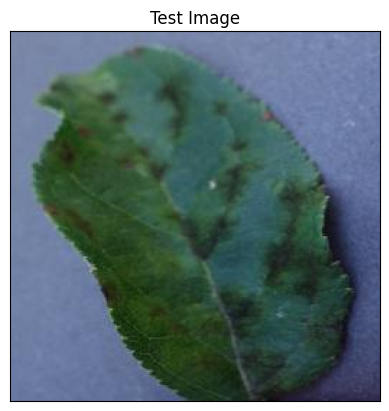

In [91]:
import cv2
image_path=r"C:\Users\madha\OneDrive\Desktop\PHYTO Guard\test\AppleScab2.JPG"
# Reading Image
img = cv2.imread(image_path) # by Default BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Convert BGR img to RGB

# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [92]:
# Preprocessing
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Conveert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [93]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 144ms/step


(array([[8.8500452e-01, 1.5285074e-06, 2.7013472e-08, 1.1499054e-01,
         1.2654696e-06, 9.4560932e-08, 6.9558958e-08, 2.7318610e-08,
         1.0107568e-06, 6.2988852e-07, 3.7644261e-07]], dtype=float32),
 (1, 11))

In [94]:
result_index = np.argmax(prediction)
result_index

0

In [95]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

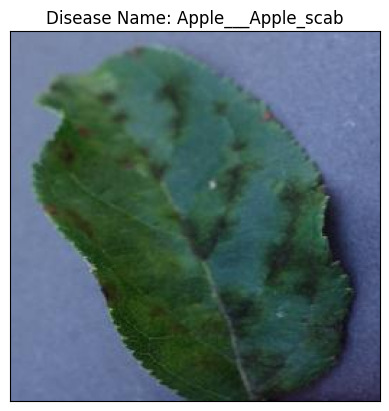

In [96]:
# Display Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [97]:
model_prediction

'Apple___Apple_scab'